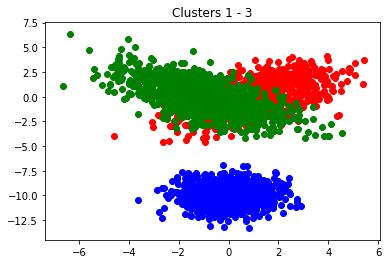

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from random import randint

mu1 = [1, 0]
mu2 = [-1, 0]
mu3 = [0, -10]

mu = []
mu.append(mu1)
mu.append(mu2)
mu.append(mu3)

U = np.matrix([[1/np.sqrt(2), -1/np.sqrt(2)], [1/np.sqrt(2), 1/np.sqrt(2)]])

S1 = np.matrix([[4, 0], [0, 1]])
S2 = np.matrix([[1, 0], [0, 5]])

Sigma1 = U @ S1 @ U.T
Sigma2 = U @ S2 @ U.T
Sigma3 =  np.identity(2)
sigma = []
sigma.append(Sigma1)
sigma.append(Sigma2)
sigma.append(Sigma3)


# Clustered data
cluster1 = np.random.multivariate_normal(mu[0], sigma[0], 1000) 
cluster2 = np.random.multivariate_normal(mu[1], sigma[1], 1000)
cluster3 = np.random.multivariate_normal(mu[2], sigma[2], 1000)

# Plotting
plt.scatter(cluster1[:,0], cluster1[:,1] , c = "red")
plt.scatter(cluster2[:,0], cluster2[:,1] , c = "green")
plt.scatter(cluster3[:,0], cluster3[:,1] , c = "blue")
plt.title("Clusters 1 - 3")
plt.show()

In [2]:
# Gathering all cluster data into X
X = np.column_stack((cluster1.T, cluster2.T, cluster3.T))
X = X.T
X = np.reshape(X, (3000,2))

# Randomly shuffle X
np.random.shuffle(X)
# Holds cluster labels for each sample
cluster_indices = np.zeros(3000)


# Initially assigning cluster 1
cluster_indices[0:1000] = 1

# Initially assigning cluster 2
cluster_indices[1000:2000] = 2

# Initially assigning cluster 3
cluster_indices[2000:3000] = 3


# Find centroids of current clusters    
def FindCentroids():
    c1 = []
    c2 = []
    c3 = []
    for i in range(0, len(cluster_indices)):
        if(cluster_indices[i] == 1):
            c1.append(X[i, :])
        if(cluster_indices[i] == 2):
            c2.append(X[i, :])
        if(cluster_indices[i] == 3):
            c3.append(X[i, :])
    centr1 = np.mean(c1)
    centr2 = np.mean(c2)
    centr3 = np.mean(c3)
    return centr1, centr2, centr3


# Reassign based on distances
def UpdateClusters(centroid1, centroid2, centroid3):
    # Changed to True if change in cluster assignment
    flag = False;
    # Now compute distances between each sample and centroids
    for i in range(0, len(X)):
        current_cluster = cluster_indices[i]
        
        point = X[i, :]
        dist1 = np.linalg.norm(centroid1 - point)
        dist2 = np.linalg.norm(centroid2 - point)
        dist3 = np.linalg.norm(centroid3 - point)
        
        min_dist = min(dist1, dist2, dist3)
        
        if(min_dist == dist1):
            if(current_cluster != 1):
                cluster_indices[i] = 1
                flag = True
                
        if(min_dist == dist2):
            if(current_cluster != 2):
                cluster_indices[i] = 2
                flag = True
                
        if(min_dist == dist3):
            if(current_cluster != 3):
                cluster_indices[i] = 3
                flag = True
                
    return flag

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Done converging.....


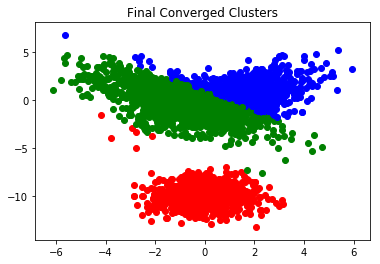

In [3]:
# First iteration: computing centroid of randomized initial clusters
cen_c1, cen_c2, cen_c3 = FindCentroids()
convergence = UpdateClusters(cen_c1, cen_c2, cen_c3)

iteration = 0
# Keep reassigning clusters until convergence
while convergence == True:
    iteration += 1
    new_cen1, new_cen2, new_cen3 = FindCentroids()
    convergence = UpdateClusters(new_cen1, new_cen2, new_cen3)
    print("Iteration: ", iteration)

print("Done converging.....")



for i in range(0, len(cluster_indices)):
    c = cluster_indices[i]
    if(c == 1):
        plt.scatter(X[i, 0], X[i, 1], c = "red")
    if(c == 2):
        plt.scatter(X[i, 0], X[i, 1], c = "green")
    if(c == 3):
        plt.scatter(X[i, 0], X[i, 1], c = "blue")
        
plt.title("Final Converged Clusters")
plt.show()